In [8]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")


In [9]:
# Read the data into a pandas dataframe
df= pd.read_csv("Recruitment_Data_updated.csv")
df.head()


,attrition,performance_rating,sales_quota_pct,recruiting_source
0,0.000707,2.976686,0.604739,Applied Online
1,-0.019452,2.989157,0.396567,NaN
2,-0.009998,2.993355,0.206242,Applied Online
3,-0.003004,1.989966,-0.475037,NaN
4,-0.025405,3.016559,0.345470,Campus


TASK

Get Average Sales Numbers and Attrition Numbers
Print out the average Sales Number grouped by Recruiting Source
Print out the average Attrition Number grouped by Recruiting Source
Take a look at these numbers to get an idea about how each Source is performing on these numbers - Keep in mind that we are looking for sources that have high Sales numbers and low Attrition numbers.
Note: Sales Numbers indicate the performance of employees recruited from a source.

In [10]:
#Print out the average Sales Number grouped by Recruiting Source

# Group the data by recruiting_source and calculate the mean of Sales Number
sales_by_source = df.groupby('recruiting_source')['sales_quota_pct'].mean()

# Print out the result
print(sales_by_source)


recruiting_source
Applied Online    1.080959
Campus            1.076408
Referral          1.075538
Search Firm       1.103426
Name: sales_quota_pct, dtype: float64


In [11]:
#Print out the average Attrition Number grouped by recruiting_source
avg_attrition_by_source = df.groupby('recruiting_source')['attrition'].mean()
print(avg_attrition_by_source)


recruiting_source
Applied Online    0.213370
Campus            0.215109
Referral          0.214920
Search Firm       0.208177
Name: attrition, dtype: float64


In [12]:
#Take a look at these numbers to get an idea about how each Source is performing on these numbers - Keep in mind 
#that we are looking for sources that have high Sales numbers and low Attrition numbers.

# merge the two data frames on recruiting_source column
performance_df = pd.merge(sales_by_source, avg_attrition_by_source, on='recruiting_source')

# sort the data frame by sales numbers and attrition numbers
performance_df = performance_df.sort_values(by=['sales_quota_pct', 'attrition'], ascending=[False, True])

# print the sorted data frame
print(performance_df)


                   sales_quota_pct  attrition
recruiting_source                            
Search Firm               1.103426   0.208177
Applied Online            1.080959   0.213370
Campus                    1.076408   0.215109
Referral                  1.075538   0.214920


Identify the best source of recruitment for a tech startup, based on previous data of candidate sources and recruitment strategies¶
ecruitment 

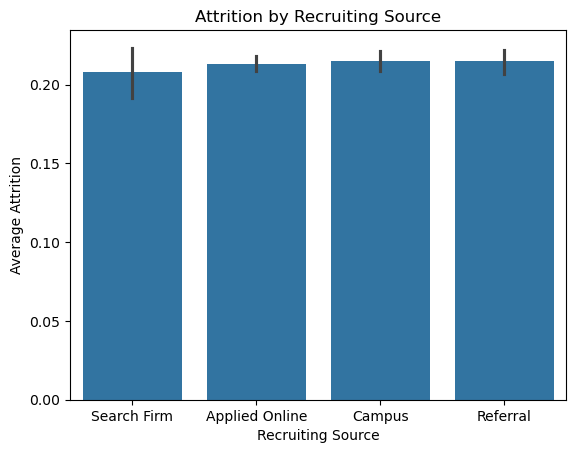

In [13]:
# Create a bar chart using seaborn
sns.barplot(x='recruiting_source', y='attrition', data=df, order=performance_df.index)

# Add axis labels and a title
plt.xlabel('Recruiting Source')
plt.ylabel('Average Attrition')
plt.title('Attrition by Recruiting Source')
plt.show()

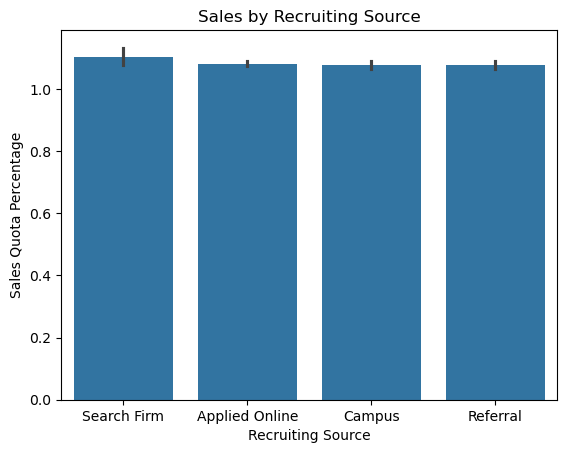

In [14]:
# Create a bar chart using seaborn
sns.barplot(x='recruiting_source', y='sales_quota_pct', data=df, order=performance_df.index)

# Add axis labels and a title
plt.xlabel('Recruiting Source')
plt.ylabel('Sales Quota Percentage')
plt.title('Sales by Recruiting Source')
plt.show()


The following inferences can be made based on the visualizations of attrition differences and sales disparities by recruiting sources:

In terms of sales performance, Applied Online is the top recruiting source, closely followed by Referral. The sales figures for Campus and Search Firm are much lower.
Search Firm and Referral are the two best recruitment sources in terms of attrition rate. Applied Online and Campus are the sources with the highest attrition rates.
Only considering sales results or attrition rates should not be used to evaluate the quality of a recruiting source. When deciding on the best recruiting source, a balance between the two elements should be taken into account.
According to the visualizations and research presented above, Applied Online appears to be the most effective recruiting source because of its strong sales results and low attrition rate. However, more research is necessary to consider additional elements like recruitment expenses, the length of time it takes to fill positions, and the diversity of candidates.
